## 1. Libraries

In [6]:
import numpy as np
import tensorflow as tf


from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## 2. Dataset

In [3]:
# x = feature     y = label/output
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [5]:
print(x_train[0])

[[[ 59.  62.  63.]
  [ 43.  46.  45.]
  [ 50.  48.  43.]
  ...
  [158. 132. 108.]
  [152. 125. 102.]
  [148. 124. 103.]]

 [[ 16.  20.  20.]
  [  0.   0.   0.]
  [ 18.   8.   0.]
  ...
  [123.  88.  55.]
  [119.  83.  50.]
  [122.  87.  57.]]

 [[ 25.  24.  21.]
  [ 16.   7.   0.]
  [ 49.  27.   8.]
  ...
  [118.  84.  50.]
  [120.  84.  50.]
  [109.  73.  42.]]

 ...

 [[208. 170.  96.]
  [201. 153.  34.]
  [198. 161.  26.]
  ...
  [160. 133.  70.]
  [ 56.  31.   7.]
  [ 53.  34.  20.]]

 [[180. 139.  96.]
  [173. 123.  42.]
  [186. 144.  30.]
  ...
  [184. 148.  94.]
  [ 97.  62.  34.]
  [ 83.  53.  34.]]

 [[177. 144. 116.]
  [168. 129.  94.]
  [179. 142.  87.]
  ...
  [216. 184. 140.]
  [151. 118.  84.]
  [123.  92.  72.]]]


In [6]:
#image = mpimg.imread("cifar10.png")
#plt.imshow(image)

In [7]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 3. Normalize 


In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
print(x_train[0])

[[[0.07182773 0.09722503 0.15002467]
  [0.05555073 0.08510671 0.16805908]
  [0.06416572 0.08557414 0.15041219]
  ...
  [0.1973893  0.2065452  0.30386147]
  [0.20651145 0.21914755 0.33373633]
  [0.20868805 0.22118571 0.32022804]]

 [[0.01947871 0.03136291 0.04762688]
  [0.         0.         0.        ]
  [0.02309966 0.01426236 0.        ]
  ...
  [0.15366383 0.1376968  0.15474427]
  [0.16167672 0.14551397 0.16359624]
  [0.17202663 0.15518676 0.17721358]]

 [[0.03043548 0.0376355  0.05000822]
  [0.02067004 0.01295102 0.        ]
  [0.0628824  0.04813546 0.02798366]
  ...
  [0.14741734 0.13143785 0.14067662]
  [0.16303535 0.14726715 0.16359624]
  [0.15369593 0.13021417 0.13057843]]

 ...

 [[0.25322318 0.26658475 0.22860903]
  [0.25966737 0.28307232 0.12697798]
  [0.25409624 0.28702992 0.0909469 ]
  ...
  [0.19988792 0.20810995 0.19694726]
  [0.07608316 0.05434859 0.02290347]
  [0.07473288 0.0606477  0.0621802 ]]

 [[0.21913545 0.21797225 0.22860903]
  [0.22349481 0.22756794 0.15685515]


## 4. Building the model

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32,(3,3), activation='relu', padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3), activation='relu', padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3), activation='relu', padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          3

## 5. Compile the model

In [13]:
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [14]:
model_fit = model.fit(x_train, y_train, epochs = 20, batch_size = 60, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 63s 2ms/sample - loss: 1.8968 - accuracy: 0.3047 - val_loss: 1.5485 - val_accuracy: 0.4413
Epoch 2/20
40000/40000 [==============================] - 60s 2ms/sample - loss: 1.5109 - accuracy: 0.4552 - val_loss: 1.3561 - val_accuracy: 0.5126
Epoch 3/20
40000/40000 [==============================] - 60s 2ms/sample - loss: 1.3735 - accuracy: 0.5030 - val_loss: 1.2141 - val_accuracy: 0.5696
Epoch 4/20
40000/40000 [==============================] - 60s 1ms/sample - loss: 1.2970 - accuracy: 0.5357 - val_loss: 1.1263 - val_accuracy: 0.6143
Epoch 5/20
40000/40000 [==============================] - 59s 1ms/sample - loss: 1.2291 - accuracy: 0.5600 - val_loss: 1.0562 - val_accuracy: 0.6265
Epoch 6/20
40000/40000 [==============================] - 59s 1ms/sample - loss: 1.1703 - accuracy: 0.5849 - val_loss: 1.0136 - val_accuracy: 0.6443
Epoch 7/20
40000/40000 [==============================] 

## 7. Evaluation

In [15]:
results = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
print(results)

[0.7806628441810608, 0.7339]


## 8. Model history

In [19]:
history_dict = model_fit.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 9. Visualization

In [8]:
acc = model_fit.history["accuracy"]
val = model_fit.history["val_accuracy"]
loss = model_fit.history["loss"]
val_loss = model_fit.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.figure(figsize=(15,12))
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'model_fit' is not defined

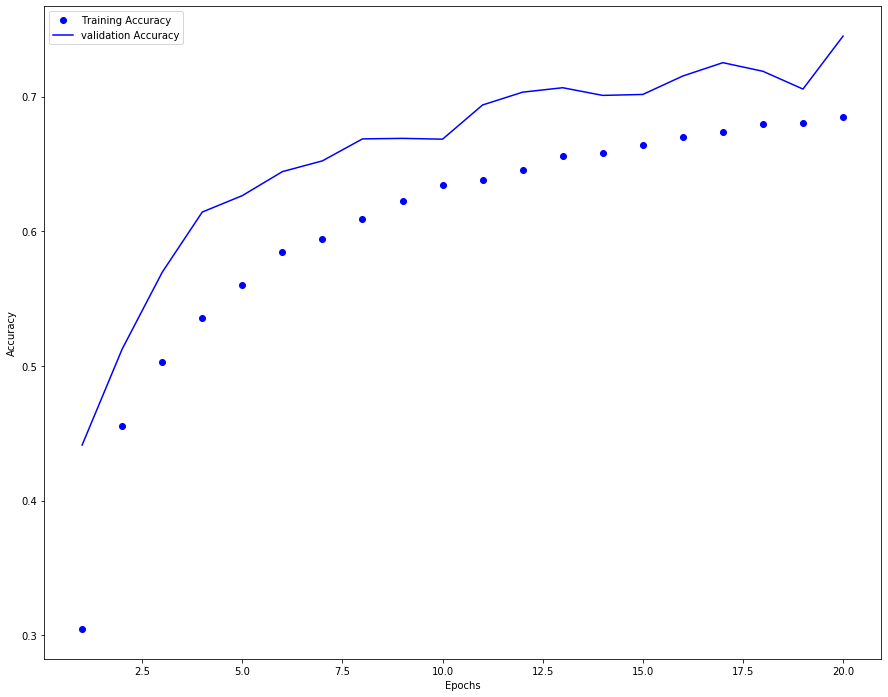

In [30]:
acc = model_fit.history["accuracy"]
val_acc = model_fit.history["val_accuracy"]
loss = model_fit.history["loss"]
val_loss = model_fit.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.figure(figsize=(15,12))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 10. Saving the model 

In [32]:
#from keras.models import load_model
from tensorflow.python.keras.models import load_model
model.save("newModel.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: newModel.model/assets


## 11. Reloading the model

In [33]:
reload_model = load_model("newModel.model")

## 12. Checking our model

In [60]:
import numpy as np 
from tensorflow.python.keras.preprocessing import image
test_image1 = image.load_img("ship.jpeg", target_size=(32,32))

In [61]:
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

print(result)
if result[0][0] == 1:
    print("plane")
elif result[0][1] == 1:
    print("auto")
elif result[0][2] == 1:
    print("bird")
elif result[0][3] == 1:
    print("cat")
elif result[0][4] == 1:
    print("deer")
elif result[0][5] == 1:
    print("dog")
elif result[0][6] == 1:
    print("frog")
elif result[0][7] == 1:
    print("horse")
elif result[0][8] == 1:
    print("ship")
elif result[0][9] == 1:
    print("truck")
else: 
    print("error")


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
auto
